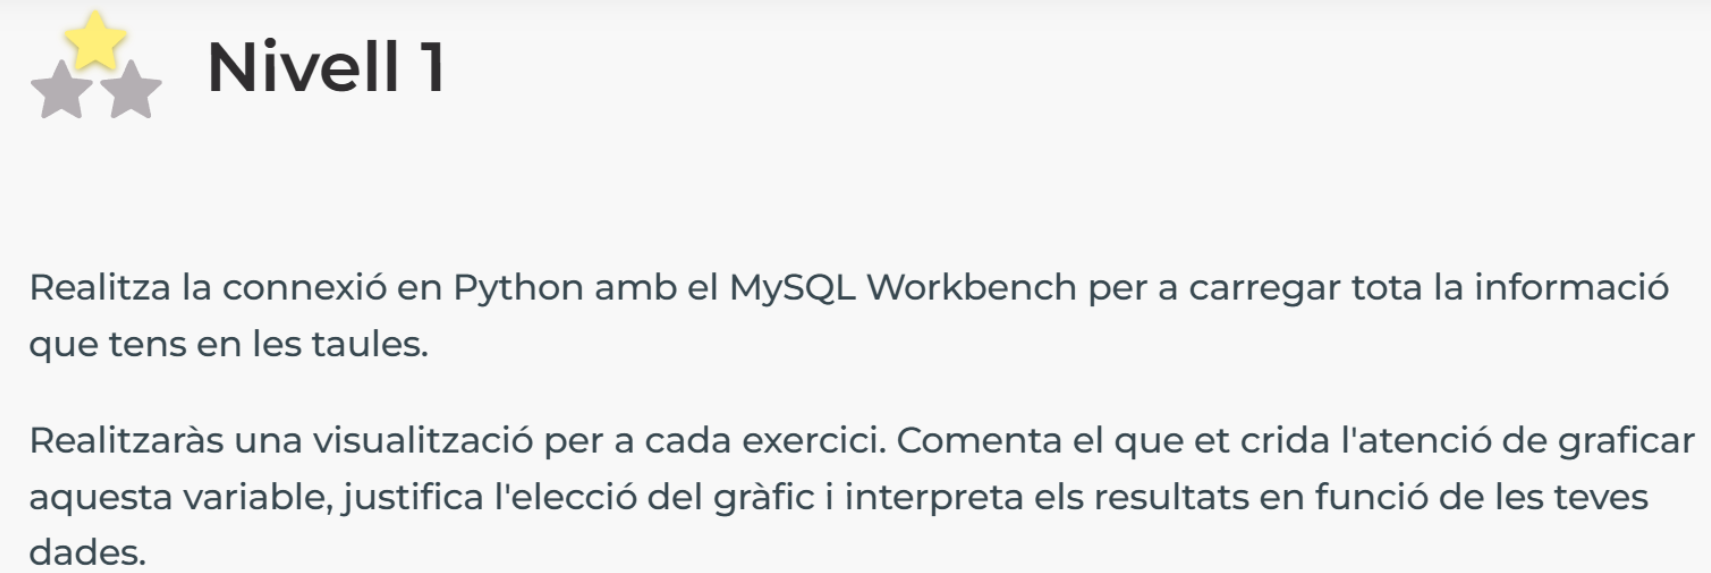

In [28]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


Primero intentamos crear, con la cláusula try, la conexión con mysql.connector especificando las credenciales pertinentes. Si se produce la conexión, creamos un diccionario en el que meteremos todas las tablas de la base de datos como dataframes para poder acudir y visualizar primero los datos que queramos usar antes de graficar.

In [29]:
import pandas as pd
import mysql.connector
from mysql.connector import Error
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

try:
    connection = mysql.connector.connect(
        host='localhost',
        database='transactions_db',
        user='root',
        password='root'
    )
    
    if connection.is_connected():
        cursor = connection.cursor()
        cursor.execute("SHOW TABLES")
        tables = cursor.fetchall()
        dfs = {}   
        for table in tables:
            table_name = table[0]  
            query = f"SELECT * FROM {table_name}"
            dfs[table_name] = pd.read_sql(query, connection)

        print("Uploaded tables as dataframes:", dfs.keys())
        
except Error as e:
    print("Error al conectar a la base de datos:", e)
    
finally:
    if connection.is_connected():
        connection.close()
        print("Conexión cerrada.")

Uploaded tables as dataframes: dict_keys(['card_status', 'companies', 'credit_cards', 'products', 'transaction_products', 'transactions', 'users'])
Conexión cerrada.


C:\Users\mique\AppData\Local\Temp\ipykernel_30612\2802488071.py:24: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



Una vez tenemos las tablas cargadas y convertidas a dataframes, podemos visualizarlas con dfs['nombre de la tabla que queramos ver']. Veamos transactions, companies y users como ejemplo para comprobar que están bien cargadas.

In [30]:
dfs['transactions']

,id,card_id,company_id,timestamp,amount,declined,product_ids,user_id,lat,longitude
0,108B1D1D-5B23-A76C-55EF-C568E49A05DD,CcU-2938,b-2222,2021-07-07 17:43:16,293.57,0,59,275,83.78390,-178.8600
1,7DC26247-20EC-53FE-E555-B6C2E55CA5D5,CcU-2945,b-2226,2022-02-04 15:52:56,312.5,0,"71, 41",275,58.93670,-76.8171
2,72997E96-DC2C-A4D7-7C24-66C302F8AE5A,CcU-2952,b-2230,2022-01-30 15:16:36,239.87,0,"97, 41, 3",275,43.35840,-17.6580
3,AB069F53-965E-A2A8-CE06-CA8C4FD92501,CcU-2959,b-2234,2021-04-15 13:37:18,60.99,0,"11, 13, 61, 29",275,1.64819,-158.0070
4,2F3B6AB6-147D-EB0B-FE8D-9A4E2EA9DBD5,CcU-2966,b-2238,2021-10-18 06:12:03,33.81,0,"47, 37, 11, 1",275,-43.48110,16.6025
...,...,...,...,...,...,...,...,...,...,...
582,C1DCC32D-E42A-F2D6-17AD-FF4A639A9B5A,CcU-3512,b-2550,2021-12-22 08:35:00,59.63,1,"71, 1, 47",267,-63.65020,-45.7184
583,5C3A8A3D-8974-40A6-A8AF-C1F7AA6B7C94,CcU-3519,b-2554,2021-07-23 15:35:14,158.05,1,"97, 31",267,15.18280,165.6620
584,D6EB93C6-5733-84C8-FDD6-57BA4136E528,CcU-3526,b-2558,2021-04-22 12:37:13,15.38,1,"5, 11",267,-50.48300,13.7144
585,A4D0D84F-4622-BB83-E6B6-51E545D4A217,CcU-3533,b-2562,2021-05-14 16:59:27,395.81,1,"7, 71, 43, 2",267,-24.64040,-69.8770


In [ ]:
dfs['companies']

,id,company_name,phone,email,country,website
0,b-2222,Ac Fermentum Incorporated,06 85 56 52 33,donec.porttitor.tellus@yahoo.net,Germany,https://instagram.com/site\r
1,b-2226,Magna A Neque Industries,04 14 44 64 62,risus.donec.nibh@icloud.org,Australia,https://whatsapp.com/group/9\r
2,b-2230,Fusce Corp.,08 14 97 58 85,risus@protonmail.edu,United States,https://pinterest.com/sub/cars\r
3,b-2234,Convallis In Incorporated,06 66 57 29 50,mauris.ut@aol.couk,Germany,https://cnn.com/user/110\r
4,b-2238,Ante Iaculis Nec Foundation,08 23 04 99 53,sed.dictum.proin@outlook.ca,New Zealand,https://netflix.com/settings\r
...,...,...,...,...,...,...
95,b-2602,Placerat LLP,05 43 67 24 41,tellus.suspendisse@hotmail.org,Netherlands,https://zoom.us/sub\r
96,b-2606,Sed Est Corp.,04 58 02 37 91,tempor.bibendum@google.couk,Canada,https://instagram.com/sub/cars\r
97,b-2610,Egestas Nunc Sed Limited,06 01 02 70 47,vitae@hotmail.edu,Italy,https://walmart.com/one\r
98,b-2614,Rutrum Non Inc.,02 66 31 61 09,neque@protonmail.net,Germany,https://netflix.com/site\r


In [32]:
dfs['users']

,id,name,surname,phone,email,birth_date,country,city,postal_code,address
0,1,Zeus,Gamble,1-282-581-0551,interdum.enim@protonmail.edu,"Nov 17, 1985",United States,Lowell,73544,348-7818 Sagittis St.
1,10,Robert,Mccarthy,(324) 746-6771,fermentum@protonmail.com,"Apr 30, 1984",United States,Eugene,85526,"P.O. Box 773, 3594 Ornare St."
2,100,Melodie,Mclean,1-677-221-7152,risus.varius@google.ca,"Sep 15, 1989",United States,College,11838,Ap #644-8492 Sagittis St.
3,101,Sarah,Beck,(358) 691-4345,vitae.risus@aol.couk,"Apr 9, 1983",United States,Great Falls,67129,"665-9047 In, Rd."
4,102,Jasper,Landry,1-397-765-1118,consectetuer.euismod@aol.org,"Apr 16, 1982",United States,Columbus,11595,Ap #374-7325 Sodales Rd.
...,...,...,...,...,...,...,...,...,...,...
270,95,Chase,Ellis,(322) 137-3271,quisque.purus@hotmail.edu,"Dec 19, 2000",United States,New Haven,72721,1311 Accumsan Road
271,96,Brennan,Wynn,(831) 607-3574,nullam.ut@yahoo.net,"Nov 1, 1988",United States,Lewiston,74004,Ap #774-4981 Elementum Avenue
272,97,Joseph,Davidson,1-184-847-8256,mauris@outlook.net,"Jan 18, 1987",United States,Allentown,88451,"P.O. Box 178, 6049 Luctus St."
273,98,Cassandra,Ferguson,(594) 318-2465,eu@google.couk,"May 8, 1992",United States,Tuscaloosa,83383,"497-7857 Eget, Rd."


También podemos hacer un poco de análisis exploratorio (EDA) de columnas con datos numéricos. Por ejemplo, podemos coger la columna weight de la tabla products y usar .describe() para ver el análisis estadístico descriptivo.

In [35]:
dfs['products']['weight'].describe()

count    100.000000
mean       1.827000
std        0.836401
min        0.600000
25%        1.150000
50%        1.750000
75%        2.475000
max        3.200000
Name: weight, dtype: float64

In [ ]:
dfs['products']['weight'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 100 entries, 0 to 99
Series name: weight
Non-Null Count  Dtype  
--------------  -----  
100 non-null    float64
dtypes: float64(1)
memory usage: 932.0 bytes


Con .info() podemos observar el tipo de dato de la columna que queramos.

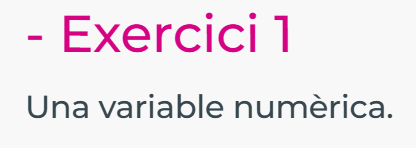

Para facilitar la rapidez a la hora de escribir código, creamos una variable con el nombre de la tabla y _df al lado asignado a dfs['nombre de la tabla'], así nos ahorramos tener que escribir dos corchetes cada vez que queramos acceder a una columna específica. Para graficar con amount, primero hacemos data cleaning y convertimos la columna a numérica decimal con astype(float). Para sacar los amounts mensuales creamos una variable, escribimos el nombre de la nueva variable con el dataframe de transactions y añadimos .resample(), luego seleccionamos mes con 'ME' en la variable timestamp, hacemos la suma con sum() y entre corchetes escribimos 'amount'.
A la hora de hacer la gráfica siempre empezamos por el alias plt de matplotlib.pyplot. Seleccionamos el tamaño de la figura con .figure, los datos que queremos graficar con .plot, añadimos título o etiquetas de los ejes con
.title, .xlabel, .ylabel. Visualizar las líneas de fondo con .grid, plt.tight_layout() ajusta el diseño de las figuras para que los elementos del objeto visual no se solapen y se vean de forma más clara. 

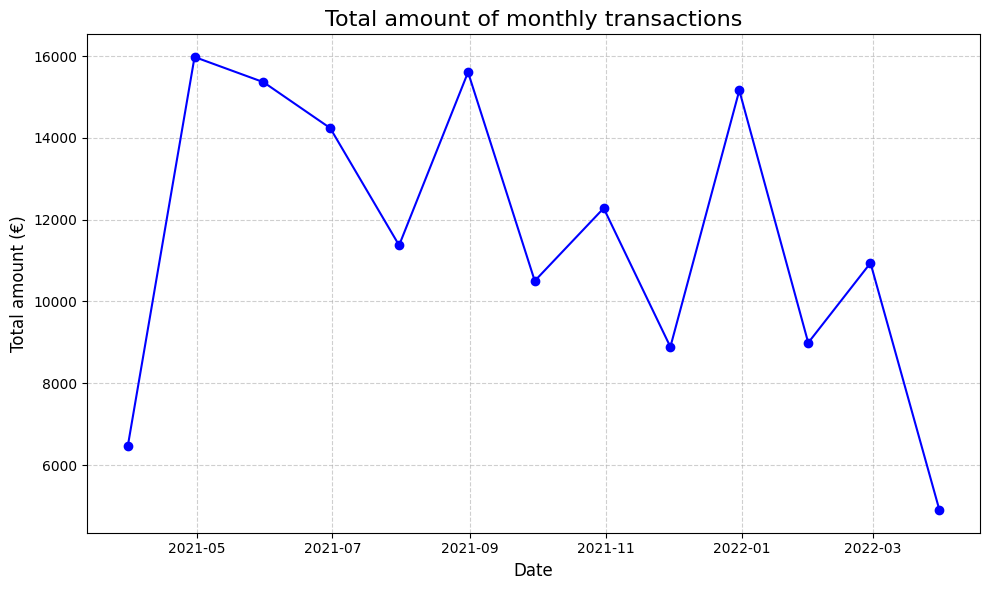

In [ ]:
transactions_df = dfs['transactions']
transactions_df['amount'] = transactions_df['amount'].astype(float)
monthly_transactions = transactions_df.resample('ME', on='timestamp').sum()['amount']

plt.figure(figsize=(10, 6))
plt.plot(monthly_transactions.index, monthly_transactions.values, marker='o', color='blue', linestyle='-')
plt.title('Total amount of monthly transactions', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total amount (€)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()  

Es interesante visualizar con un gráfico de líneas el importe total de transacciones por mes que se realizan a lo largo del año para que la empresa vea en qué momento hay una mayor actividad durante el periodo 2021/2022. El gráfico lineal es el más intuitivo para ver subidas o bajadas de importes a lo largo de un período de tiempo. Mayo y septiembre de 2021 son los meses con mayor actividad. Enero de 2022 también. 

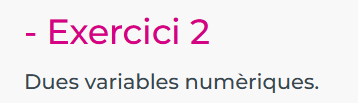

Para este ejercicio usamos las variables peso y precio de la tabla products. Hacemos data cleaning y eliminamos el símbolo de $ y convertimos la columna en float.

In [ ]:
products_df = dfs['products']
products_df['price'] = products_df['price'].str.replace(r'\$', '', regex = True).astype(float)
products_df

,id,product_name,price,colour,weight,warehouse_id
0,1,Direwolf Stannis,161.11,#7c7c7c,1.0,WH-4
1,10,Karstark Dorne,119.52,#f4f4f4,2.4,WH--5
2,100,south duel,40.43,#6d6d6d,3.0,WH--95
3,11,Karstark Dorne,49.70,#141414,2.7,WH--6
4,12,duel Direwolf,181.60,#a8a8a8,2.1,WH--7
...,...,...,...,...,...,...
95,95,riverlands north Direwolf,6.90,#c1c1c1,2.7,WH--90
96,96,dooku solo,20.92,#282828,2.1,WH--91
97,97,jinn Winterfell,65.25,#bababa,1.0,WH--92
98,98,Direwolf Littlefinger,38.33,#bababa,2.0,WH--93


A continuación usamos la librería seaborn para crear un gráfico de dispersión. En data cogemos el df de products, 
x será el peso e y será el precio. Hue será los valores que queremos ver en la gráfica. Configuramos el título y 
los nombres de los ejes como antes con plt.

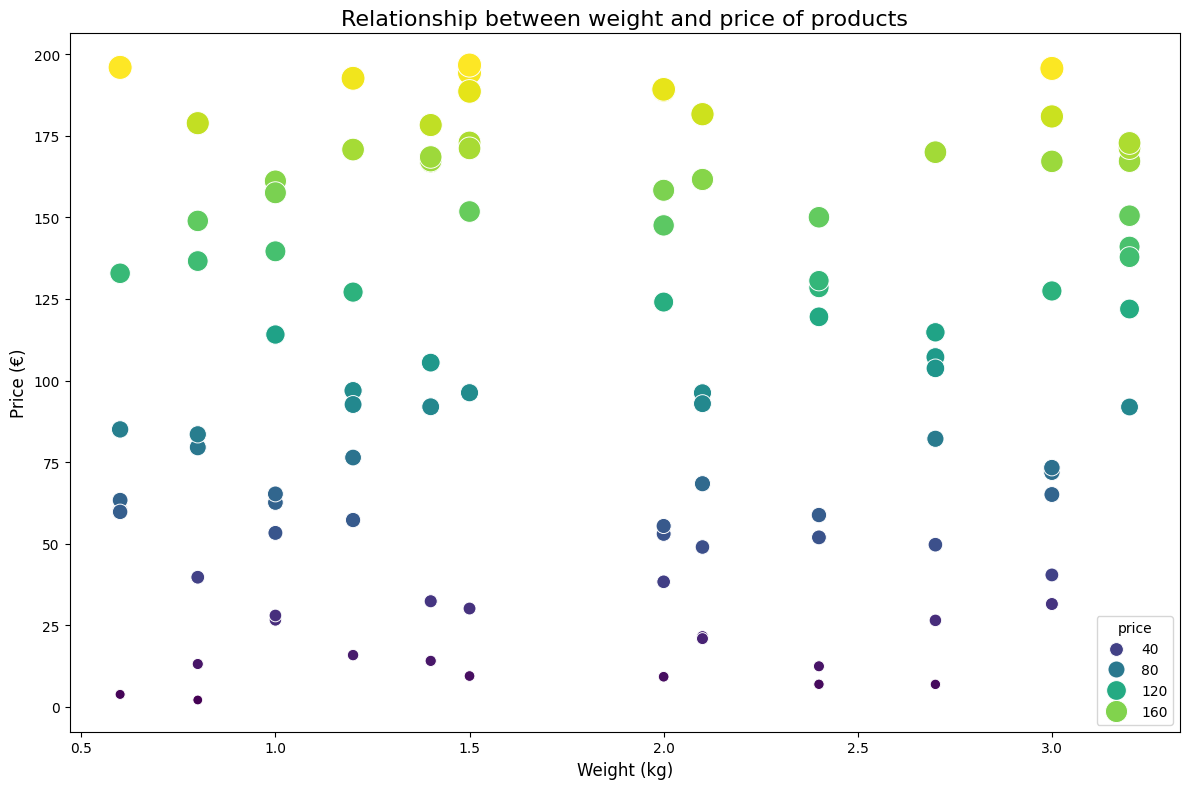

In [ ]:
plt.figure(figsize=(12, 8)) 
scatter = sns.scatterplot(
    data=products_df,
    x="weight",
    y="price",
    size="price",
    hue="price",
    palette="viridis",
    sizes=(50, 300)
)

plt.title("Relationship between weight and price of products", fontsize=16)
plt.xlabel("Weight (kg)", fontsize=12)
plt.ylabel("Price (€)", fontsize=12)
plt.subplots_adjust(left=0.2, right=0.8, top=0.9, bottom=0.2)
plt.yticks(fontsize=10, rotation=0)
plt.xticks(fontsize=10)
plt.tight_layout()
plt.show()

La idea detrás de esta gráfica de dispersión era averiguar si existía algún tipo de relación entre el peso y el precio de los productos. Podemos observar que la relación es muy baja,  no hay una distribución muy clara o lineal. Hay precios altos para productos con poco o mucho peso y vice versa.

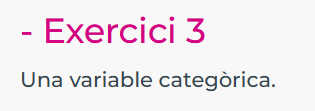

In [ ]:
companies_df = dfs['companies']
companies_df

,id,company_name,phone,email,country,website
0,b-2222,Ac Fermentum Incorporated,06 85 56 52 33,donec.porttitor.tellus@yahoo.net,Germany,https://instagram.com/site\r
1,b-2226,Magna A Neque Industries,04 14 44 64 62,risus.donec.nibh@icloud.org,Australia,https://whatsapp.com/group/9\r
2,b-2230,Fusce Corp.,08 14 97 58 85,risus@protonmail.edu,United States,https://pinterest.com/sub/cars\r
3,b-2234,Convallis In Incorporated,06 66 57 29 50,mauris.ut@aol.couk,Germany,https://cnn.com/user/110\r
4,b-2238,Ante Iaculis Nec Foundation,08 23 04 99 53,sed.dictum.proin@outlook.ca,New Zealand,https://netflix.com/settings\r
...,...,...,...,...,...,...
95,b-2602,Placerat LLP,05 43 67 24 41,tellus.suspendisse@hotmail.org,Netherlands,https://zoom.us/sub\r
96,b-2606,Sed Est Corp.,04 58 02 37 91,tempor.bibendum@google.couk,Canada,https://instagram.com/sub/cars\r
97,b-2610,Egestas Nunc Sed Limited,06 01 02 70 47,vitae@hotmail.edu,Italy,https://walmart.com/one\r
98,b-2614,Rutrum Non Inc.,02 66 31 61 09,neque@protonmail.net,Germany,https://netflix.com/site\r


En este ejercicio cogeremos la distribución de los países que tienen las empresas. Para ello cogemos la columna country y añadimos .value_counts(). Usamos plt.bar para generar el gráfico de barras e introducimos el índice y los valores de la variable creadada anteriormente para contar dicha frecuencia o distribución.

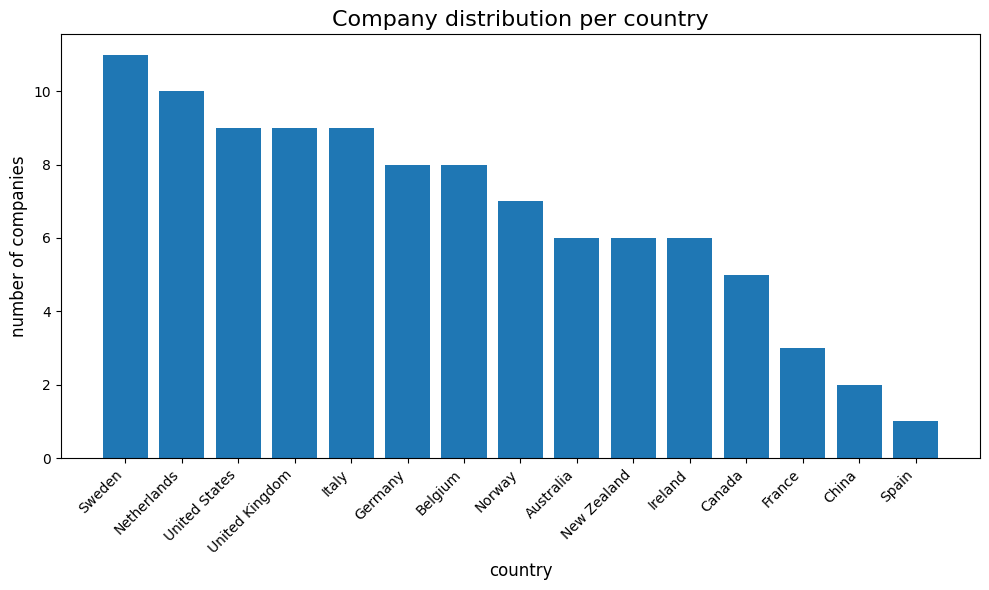

In [ ]:
country_counts = companies_df['country'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(country_counts.index, country_counts.values)
plt.title("Company distribution per country", fontsize=16)
plt.xlabel("country", fontsize=12)
plt.ylabel("number of companies", fontsize=12)
plt.xticks(country_counts.index, rotation=45, ha="right")
plt.tight_layout()
plt.show()

Para la variable categórica he seleccionado la distribución de las empresas por países. Para ver distribuciones, la gráfica de barras es la más visual y fácil de comprender. Podemos ver directamente qué países tienen mayor número de empresas y valorar mejor la importancia que hay que darle a cada mercado. Vemos que Suecia, Holanda y Estados Unidos tienen el mayor número, mientras que China y España no pasan de 2 empresas. 

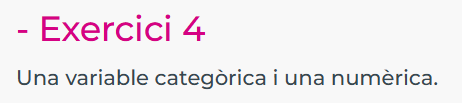

Para este ejercicio usaremos un heatmap de la librería seaborn con los 10 usuarios con mayor importe de ventas. Antes de nada, debemos unir los dataframes transactions_df y users_df por medio del id de users y también crearemos una columna con el nombre y apellido de los usuarios. La variable user_trans se agrupa por nombre y se calcula la suma total de amount. Reseteamos el índice con .reset_index() y ordenamos de mayor a menor importe de ventas. Para coger los 10 primeros basta con usar .head(10). Usamos sns.heatmap y le damos formato naranja, sin decimales y que aparezcan los importes con annot = True.

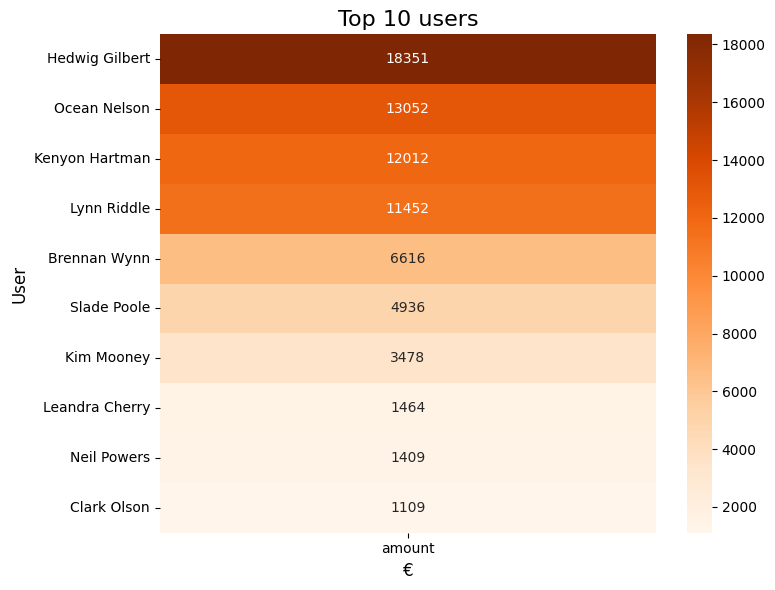

In [ ]:
users_df = dfs['users']
users_df['full_name'] = users_df['name'] + ' ' + users_df['surname']
merged_df = pd.merge(transactions_df, users_df, left_on='user_id', right_on='id')
user_trans = merged_df.groupby('full_name')['amount'].sum().reset_index()
user_trans = user_trans.sort_values(by='amount', ascending=False)
top_10_users = user_trans.head(10).set_index('full_name')
plt.figure(figsize=(8, 6))
sns.heatmap(top_10_users, annot = True, fmt = ".0f", cmap = 'Oranges')
plt.title('Top 10 users', fontsize=16)
plt.ylabel('User', fontsize=12)
plt.xlabel('€', fontsize=12)
plt.tight_layout()
plt.show()

Este heatmap nos permite valorar cuáles son los usuarios más activos a nivel de usuario. Siempre conviene saber qué clientes operan más con la empresa para ofrecerles descuentos o promociones. Vemos que Hedwig Gilbert tiene el mayor importe con 18.351€, seguido por Ocean Nelson con 13.052€. Los 5 primeros usuarios suman más de 50.000€ en transacciones.

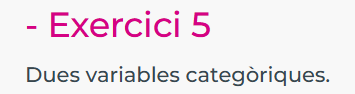

Haremos uso de plotly para graficar con un treemap la proporción de usuarios que hay en cada país. Escribimos users_df y ponemos en path las columnas country y full_name.

In [ ]:
import plotly.express as px

fig = px.treemap(users_df, 
                 path=["country", "full_name"],  
                 title="User distribution by name and country",
                 width=800, 
                 height=600)

fig.show()

Como vemos, Estados Unidos tiene una proporción de usuario, seguido por Canadá y Reino Unido. Si pasamos el cursor por encima de los recuadros, veremos el nombre de cada usuario.

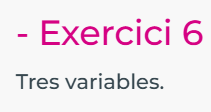

Para este ejercicio, usaremos una gráfica circular para reflejar los 5 países con mayor número de transacciones teniendo en cuenta todas las empresas de cada país. Empezamos fusionando las tablas transactions_df y companies_df usando company_id y id como claves, creando un nuevo DataFrame (merged_df). Luego, agrupa los datos por company_name y country, sumando las transacciones de cada grupo y creando una tabla con las sumas por país y empresa. A continuación, selecciona los 5 países con el mayor total de transacciones utilizando nlargest(5) y filtra la tabla para incluir solo esos países. Después, se calcula el total de transacciones por país y se crea un gráfico de pie (plt.pie) que muestra el porcentaje de transacciones de cada uno de estos 5 países.

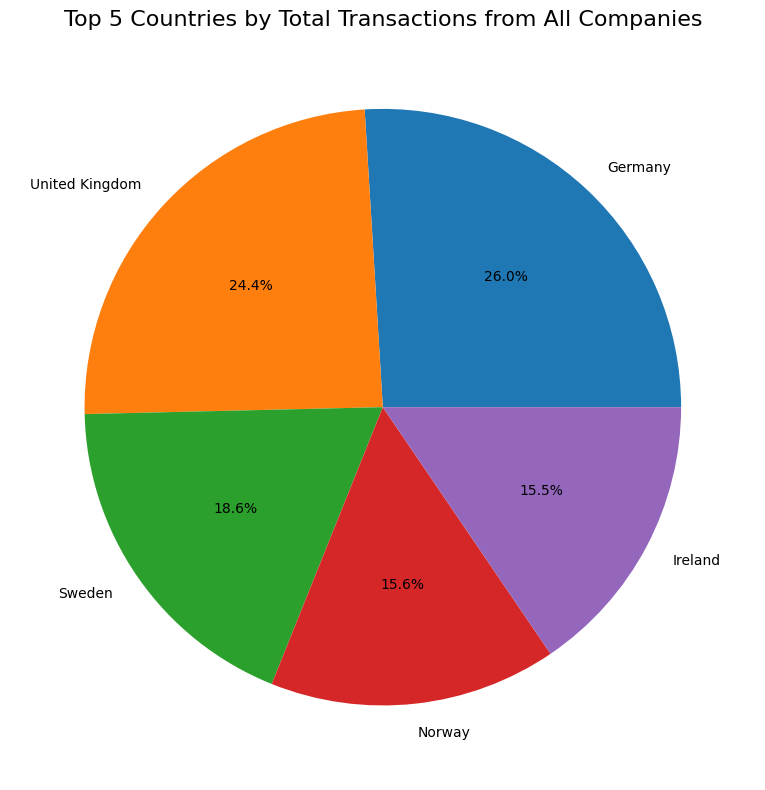

In [ ]:
merged_df = pd.merge(transactions_df, companies_df, left_on='company_id', right_on='id')
grouped_df = merged_df.groupby(['company_name', 'country'])['amount'].sum().unstack(fill_value=0)
top_5_countries = merged_df.groupby('country')['amount'].sum().nlargest(5).index
grouped_df_top_5 = grouped_df[top_5_countries]
country_totals = grouped_df_top_5.sum(axis=0)

plt.figure(figsize=(8, 8))
plt.pie(country_totals, autopct='%1.1f%%', labels=country_totals.index)
plt.title("Top 5 Countries by Total Transactions from All Companies", fontsize=16)
plt.tight_layout()
plt.show()

Esto indica que Alemania y el Reino Unido tienen las mayores proporciones de transacciones, con más del 50% del total combinado. Conviene prestar atención al mercado alemán y británico ya que sus empresas realizan el mayor número de transacciones.

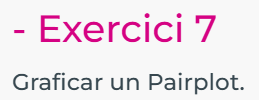

Los gráficos de pairplot suelen ser útiles con variables numéricas. En nuestro caso podemos, coger las variables amount, weight y price de las tablas transactions y products.

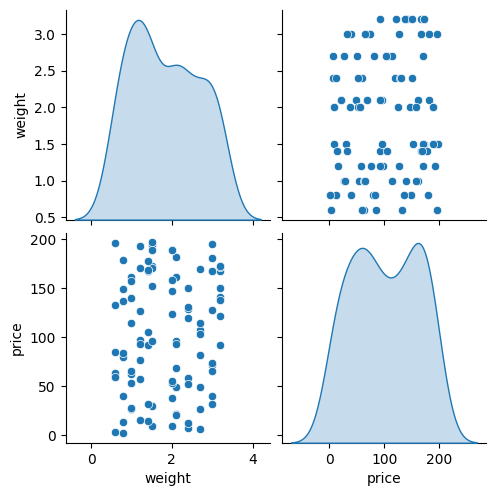

In [ ]:
columns = ['weight', 'price']
sns.pairplot(products_df[columns], diag_kind = 'kde')
plt.show()

Las gráficas en la diagonal muestran las distribuciones de cada variable (weight y price) utilizando un gráfico de densidad (kde).
Para weight (peso), la distribución parece ser asimétrica con un pico cercano a 1.5-2. Esto indica que la mayoría de los productos tienen un peso en ese rango. Para price (precio), la distribución es bimodal, lo que significa que hay dos grupos principales de precios. Uno está en el rango bajo y otro cerca de 150-200, sugiriendo que los productos se dividen en dos categorías de precios.

La gráfica en la parte inferior izquierda muestra cómo se relacionan el peso y el precio. Aquí no parece haber una relación lineal clara: los puntos están dispersos en toda la gráfica. Esto podría indicar que el precio no está directamente relacionado con el peso.
La dispersión uniforme de los puntos sugiere que hay productos ligeros y pesados en ambos rangos de precios.
En resumen, esta gráfica sugiere que la mayoría de los productos tienen pesos moderados (1.5-2), los precios presentan dos categorías principales (bajo y alto), no hay una relación evidente entre peso y precio.

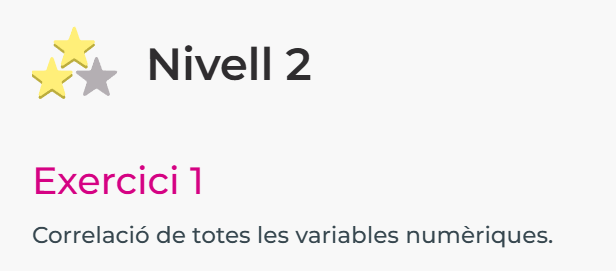

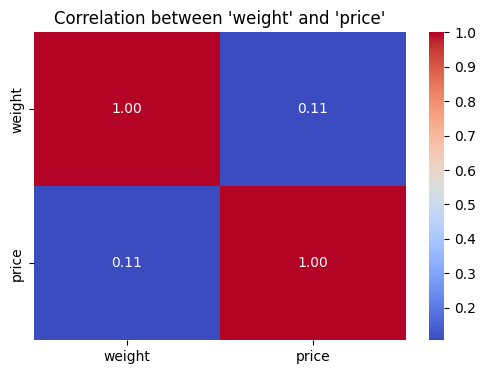

In [ ]:
correlation_matrix = products_df[['weight', 'price']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between 'weight' and 'price'")
plt.show()

Similar al gráfico de dispersión realizado con anterioridad, podemos hacer un gráfico de correlación con las variables peso y precio de la tabla products. Como ya vimos en el otro gráfico, no parecían tener ninguna correlación, en este caso se corrobora ya que el coeficiente está muy lejos de 1. 

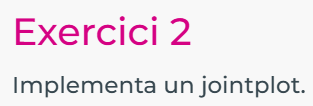

Para este jointplot crearemos la variable age de los usuarios a partir de su fecha de nacimiento, restamos el año actual menos el año que aparece en la columna birth_date. Así analizamos si la edad influye en el importe de las transacciones.

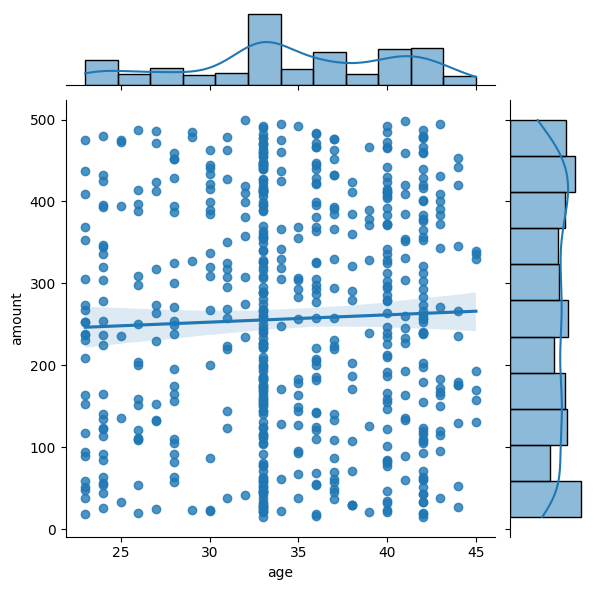

In [ ]:
users_df['birth_date'] = pd.to_datetime(users_df['birth_date'])
users_df['age'] = pd.Timestamp.now().year - users_df['birth_date'].dt.year
merged_users = transactions_df.merge(users_df, left_on='user_id', right_on='id')
sns.jointplot(data=merged_users, x='age', y='amount', kind='reg')

 Como vemos, la edad no influye en el importe pero si que podemos ver que se produce un mayor número de transacciones entre los 30 y los 35 años.

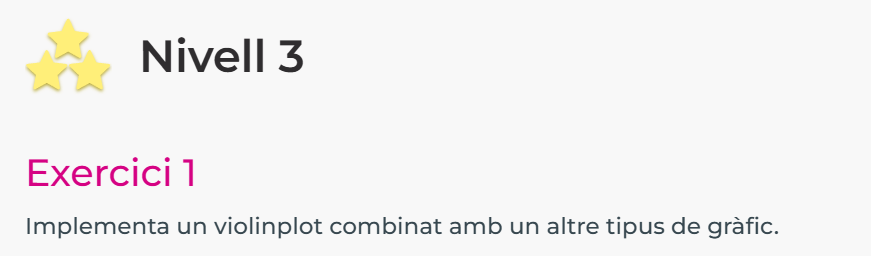

Haremos el violinplot combinado con un gráfico lineal que muestre la distribución de precios de los productos en cada país combinado con sus precios promedios. Para ello, uniremos la tabla transaction_products, transactions y companies 

Esta gráfica muestra la distribución de los precios de los productos en distintos países mediante gráficos de violín, combinados con una línea roja que representa el precio promedio en cada país. Los gráficos de violín reflejan la dispersión y densidad de los precios, mientras que la línea resalta las tendencias en las variaciones del promedio. Esta visualización permite analizar tanto la variabilidad de los precios individuales como las diferencias generales por país.

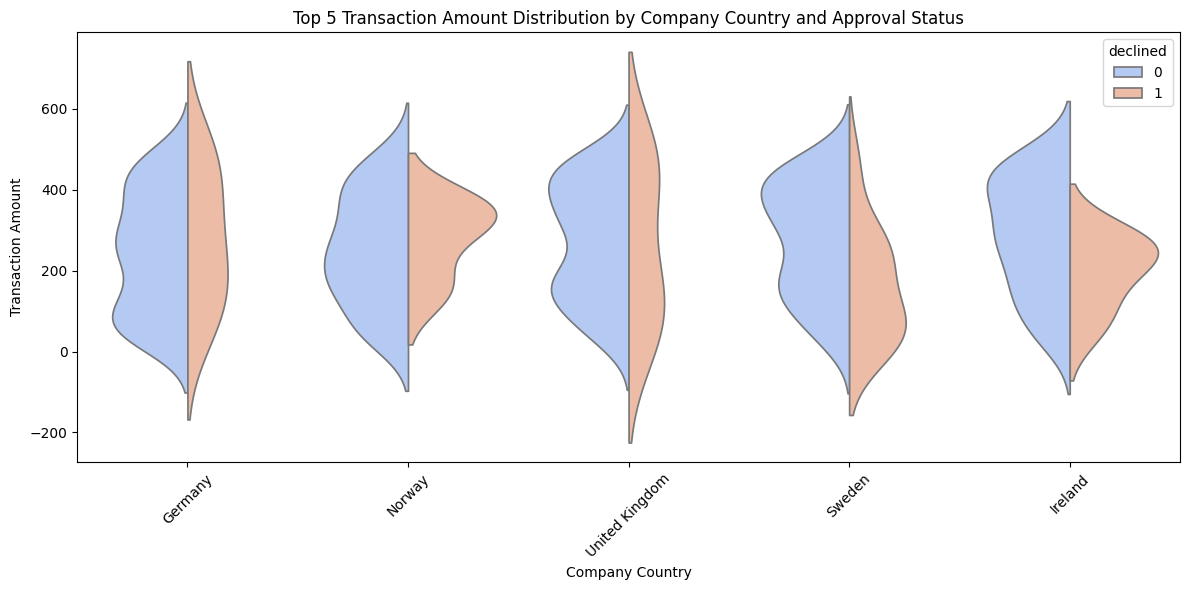

In [ ]:
merged_data = transactions_df.merge(companies_df, left_on = 'company_id', right_on = 'id')
top_5_countries = merged_data.groupby('country')['amount'].sum().nlargest(5).index
top_5_data = merged_data[merged_data['country'].isin(top_5_countries)]

plt.figure(figsize=(12, 6))
sns.violinplot(data = top_5_data, x = 'country', y = 'amount', hue = 'declined', split = True, palette = 'coolwarm', inner = None)

plt.title('Top 5 Transaction Amount Distribution by Company Country and Approval Status')
plt.ylabel('Transaction Amount')
plt.xlabel('Company Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

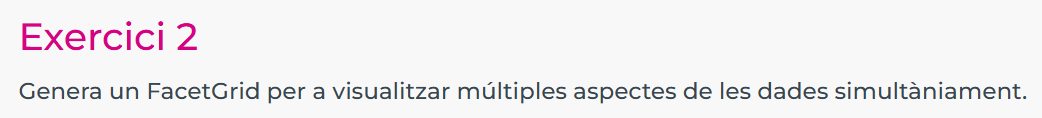

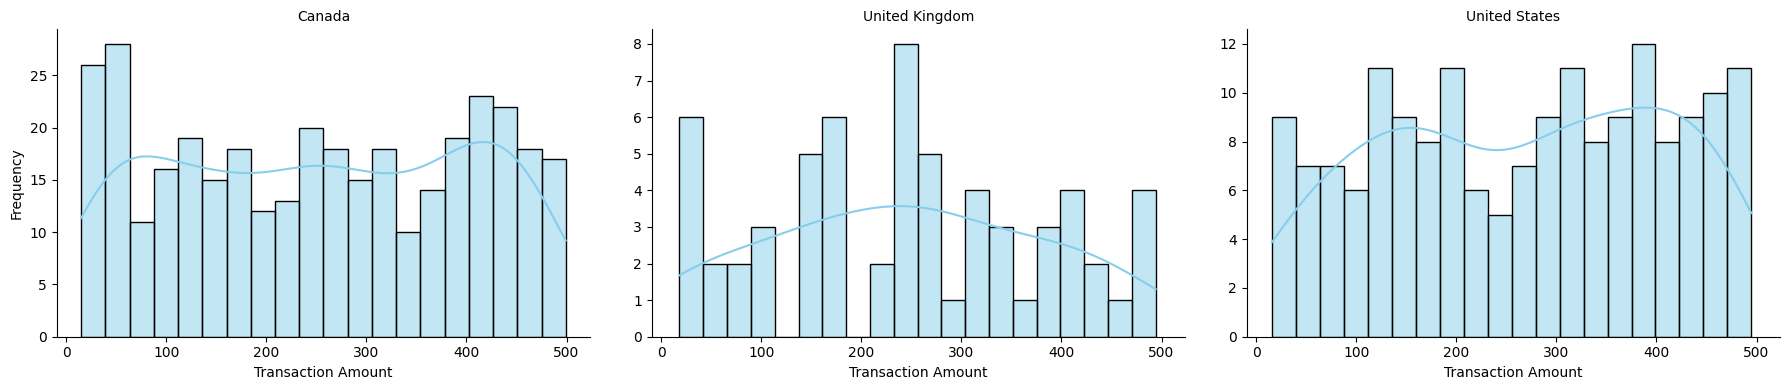

C:\Users\mique\AppData\Local\Temp\ipykernel_30612\2474549742.py:13: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



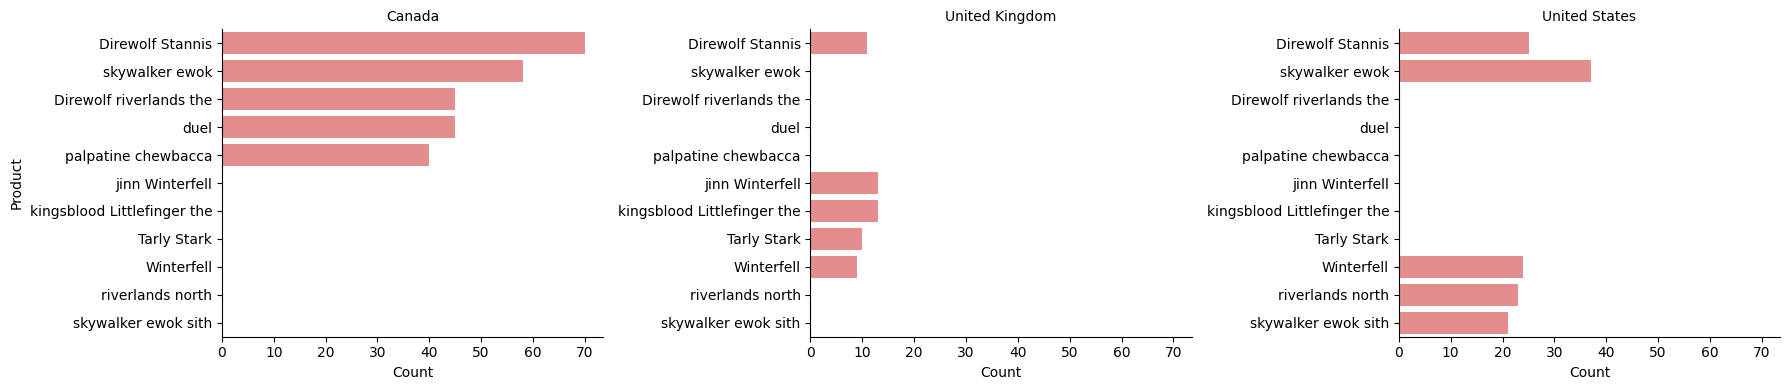

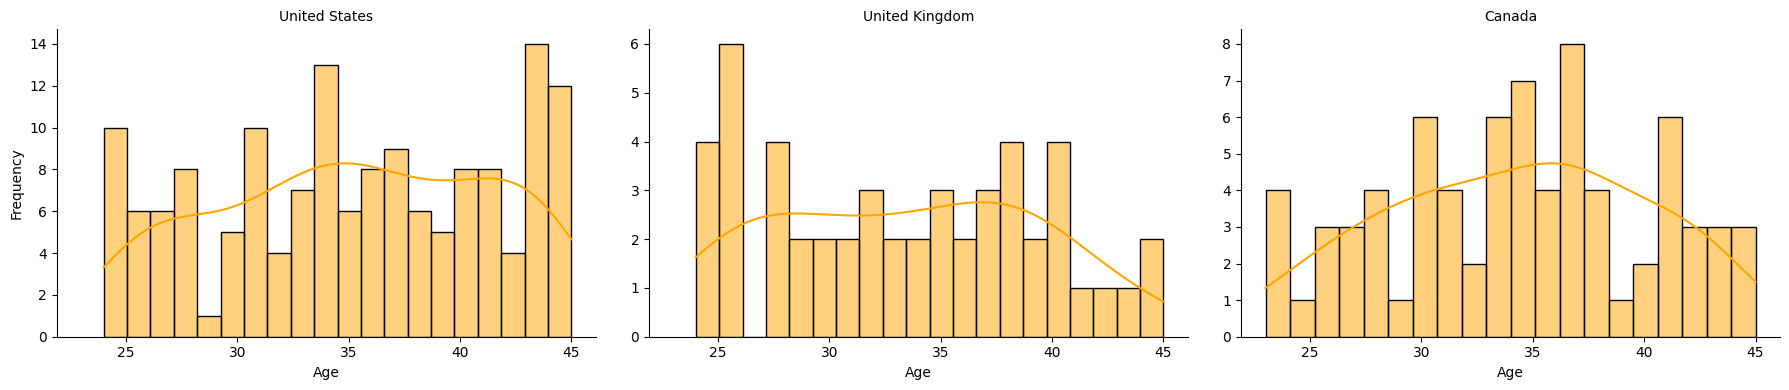

In [ ]:
transaction_products_df = dfs['transaction_products']
transactions_products = transactions_df.merge(transaction_products_df, left_on='id', right_on='transaction_id')
transactions_products = transactions_products.merge(users_df[['id', 'country']], left_on='user_id', right_on='id')
transactions_products = transactions_products.merge(products_df, left_on='product_id', right_on='id')

g = sns.FacetGrid(transactions_with_country, col="country", height=4, aspect=1.5, sharey=False)
g.map(sns.histplot, "amount", kde=True, bins=20, color="skyblue")
g.set_axis_labels("Transaction Amount", "Frequency")
g.set_titles("{col_name}")
plt.show()

product_counts = transactions_products.groupby(['country', 'product_name']).size().reset_index(name='count')
top_products = product_counts.groupby('country').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)
g = sns.FacetGrid(top_products, col="country", height=4, aspect=1.5, sharey=False)
g.map(sns.barplot, "count", "product_name", color="lightcoral", order=top_products['product_name'].unique())
g.set_titles("{col_name}")
g.set_axis_labels("Count", "Product")
plt.tight_layout()
plt.show()

g = sns.FacetGrid(users_df, col="country", height=4, aspect=1.5, sharey=False)
g.map(sns.histplot, "age", kde=True, bins=20, color="orange")
g.set_axis_labels("Age", "Frequency")
g.set_titles("{col_name}")
plt.show()

Con estos facetgrids podemos visualizar 3 aspectos de la tabla users: la frecuencia con la que se repiten los importes de las transacciones según la columna país de la tabla de usuarios, los 5 productos más comprados en cada país y la distribución por edades de usuarios.
Como vemos, los importes más frecuentes en Canadá están entre 0-100€, 250€ en Reino Unido y cerca de 400€ en Estados Unidos. Los productos Direwolf Stannis y skywalker ewok están entre los 5 productos más comprados en Canadá, Estados Unidos y Reino Unido. 